In [26]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)   # Tensorflow의 버전을 출력

import os
import glob


from PIL import Image
import os, glob

2.2.0


### Data 구성 방법

In [27]:
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=2041   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor*/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1
    print(idx)
    
    for file in glob.iglob(img_path+'/rock*/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1
    print(idx)
   
    for file in glob.iglob(img_path+'/paper*/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
    print(idx)
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)

x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

632
1322
2041
학습데이터(x_train)의 이미지 개수는 2041 입니다.
x_train shape: (2041, 28, 28, 3)
y_train shape: (2041,)


라벨:  0


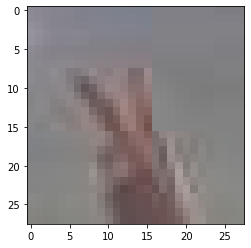

In [28]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

### 모델 구성 방법

In [43]:

model=keras.models.Sequential()
#model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
#model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(3,3))
model.add(keras.layers.Flatten())
#model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 32)                36896     
_________________________________________________________________
dense_21 (Dense)             (None, 3)                

## 최종학습기법

In [44]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=10)

model.summary()

Epoch 1/10
64/64 [==============================] - 1s 8ms/step - loss: 1.0905 - accuracy: 0.3753
Epoch 2/10
64/64 [==============================] - 1s 8ms/step - loss: 0.9551 - accuracy: 0.5316
Epoch 3/10
64/64 [==============================] - 1s 8ms/step - loss: 0.6916 - accuracy: 0.6987
Epoch 4/10
64/64 [==============================] - 1s 8ms/step - loss: 0.5276 - accuracy: 0.7937
Epoch 5/10
64/64 [==============================] - 1s 8ms/step - loss: 0.3827 - accuracy: 0.8736
Epoch 6/10
64/64 [==============================] - 0s 8ms/step - loss: 0.2754 - accuracy: 0.9192
Epoch 7/10
64/64 [==============================] - 1s 8ms/step - loss: 0.1858 - accuracy: 0.9539
Epoch 8/10
64/64 [==============================] - 1s 8ms/step - loss: 0.1231 - accuracy: 0.9740
Epoch 9/10
64/64 [==============================] - 1s 8ms/step - loss: 0.0847 - accuracy: 0.9858
Epoch 10/10
64/64 [==============================] - 0s 8ms/step - loss: 0.0680 - accuracy: 0.9843
Model: "sequential_

In [45]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper_test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_test.shape))
print("y_train shape: {}".format(y_test.shape))

테스트데이터(x_test)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


In [49]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 0.0413 - accuracy: 0.9833
test_loss: 0.04128324240446091 
test_accuracy: 0.9833333492279053


## 어떤 라벨이 틀렸나?

In [54]:
predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1) # 가장 큰 값을 답으로!

예측확률분포: [3.3840981e-06 6.7965859e-01 3.2033798e-01]
라벨: 2, 예측결과: 1


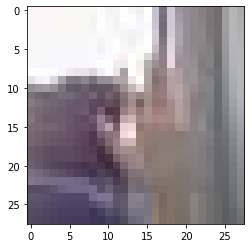

예측확률분포: [3.4073503e-06 5.7985950e-01 4.2013717e-01]
라벨: 2, 예측결과: 1


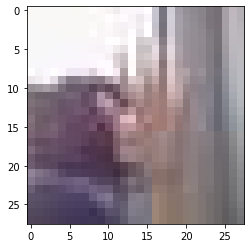

예측확률분포: [4.4607523e-06 6.2233400e-01 3.7766153e-01]
라벨: 2, 예측결과: 1


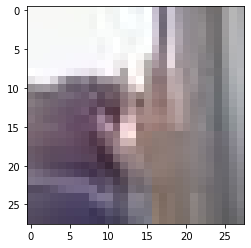

예측확률분포: [4.6024317e-07 5.6918752e-01 4.3081197e-01]
라벨: 2, 예측결과: 1


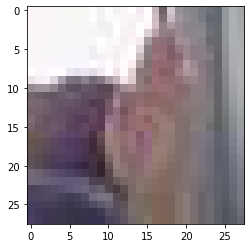

예측확률분포: [6.1915080e-07 5.0651592e-01 4.9348342e-01]
라벨: 2, 예측결과: 1


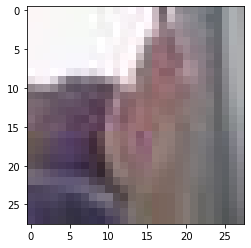

In [57]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

for n in wrong_predict_list:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## 보인데 가위라고 판단했네요